# Libraries

In [266]:
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# nltk
import nltk
from nltk.corpus import brown
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
# sklearn
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import tweepy as tw
import twitter 
import preprocessor as p
from snowballstemmer import TurkishStemmer
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
nltk.download('punkt')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Twitter API Connection 

In [ ]:
auth = tweepy.auth.OAuthHandler('xxxxxxx', 'xxxxxxx')
auth.set_access_token('xxxxxx','xxxxxx')

api = tweepy.API(auth)

# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search_tweets,
                           q = "dolar",
                           since = "2021-11-25",
                           until = "2021-12-25",
                           lang = "tr").items():

    # Writing to csv file
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
print (tweet.created_at, tweet.text)
csvFile.close()

In [1]:
# Cheking Tweets on Dataframe

In [22]:
df=pd.read_csv('Results.csv')

In [23]:
df.head(3)

,2021-12-24 23:58:40+00:00,b'RT @kuetos1453: #EnineBoyuna\nAsgari \xc3\xbccret an itibar\xc4\xb1 ile 425 Dollar!\nBu da devlet taraf\xc4\xb1ndan verilmi\xc5\x9f bir gizli zam M\xc4\xb1!\n\xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\nFaiz derken Fai\xe2\x80\xa6'
0,2021-12-24 23:49:46+00:00,b'@attack_drac 5 dollar https://t.co/MHlGaPJfzN'
1,2021-12-24 23:45:44+00:00,b'@MehmetP81941379 @edi_edi34 @nurettincanikli...
2,2021-12-24 23:38:06+00:00,b'@HaberReport Yawww biri bana s\xc3\xb6ylesin...


In [24]:
df= df.reset_index(drop=True)

In [25]:
df = df.set_axis(['date', 'tweets'], axis=1, inplace=False)

In [27]:
df.head(3)

,date,tweets
0,2021-12-24 23:49:46+00:00,b'@attack_drac 5 dollar https://t.co/MHlGaPJfzN'
1,2021-12-24 23:45:44+00:00,b'@MehmetP81941379 @edi_edi34 @nurettincanikli...
2,2021-12-24 23:38:06+00:00,b'@HaberReport Yawww biri bana s\xc3\xb6ylesin...


# Cleaning Of Tweets

In [19]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [28]:
import spacy

nlp = spacy.load('en_core_web_sm')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() 
                 or lemma == '-PRON-'] 
    # Print string after text cleaning
    return ' '.join(a_lemmas)

df['tweets_cleaned'] = \
                   df['tweets'].progress_apply(cleaner)

  0%|          | 0/18333 [00:00<?, ?it/s]

In [273]:
df.head(6)

,date,tweets,tweets_cleaned,label,score,label,score,label,score
0,2021-12-24 23:49:46+00:00,b'@attack_drac 5 dollar https://t.co/MHlGaPJfzN',dollar,1,0.573030,positive,0.573030,positive,0.573030
1,2021-12-24 23:45:44+00:00,b'@MehmetP81941379 @edi_edi34 @nurettincanikli...,var ki sen at bi ibanda,0,0.695054,negative,0.695054,negative,0.695054
2,2021-12-24 23:38:06+00:00,b'@HaberReport Yawww biri bana s\xc3\xb6ylesin...,yawww biri bana napim simdi paramla biri faiz ...,0,0.933523,negative,0.933523,negative,0.933523
3,2021-12-24 23:18:39+00:00,b'@BuckeFPS 1 dollar',dollar,1,0.573030,positive,0.573030,positive,0.573030
4,2021-12-24 23:06:23+00:00,b'#EnineBoyuna\nAsgari \xc3\xbccret an itibar\...,an ile da devlet bir gizli zam,0,0.852814,negative,0.852814,negative,0.852814
5,2021-12-24 22:57:03+00:00,b'@enginozkoc Ulan senin ...gibi pensilvanya u...,ulan senin gibi pensilvanya kel kim kim hayati...,0,0.922926,negative,0.922926,negative,0.922926


In [35]:
df['tweets_cleaned']=df['tweets_cleaned'].str.lower()

In [ ]:
# Creating List Of Sentences

In [38]:
list_of_sentences= [sentence for sentence in df.tweets_cleaned]

lines= []
for sentence in list_of_sentences:
    words=sentence.split()
    for w in words:
        lines.append(w)

In [43]:
lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [44]:
lines2[0:5]

['dollar', 'var', 'ki', 'sen', 'at']


# Stemming

In [47]:
from TurkishStemmer import TurkishStemmer
stemmer = TurkishStemmer()
stemmer.stem("akrabalarındakilerden")


'akraba'

In [51]:
stem= []

for word in lines2:
    stem.append(stemmer.stem(word))

# Stopwords

In [53]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [75]:
stopwords_path = "turkish.txt"
stopwords = get_stopwords_list(stopwords_path)

In [76]:
stopwords[0:15]

['illa',
 'nedenlerden',
 'que',
 'oysaki',
 'nazaran',
 'birisinde',
 'kimisine',
 'Nasıl',
 'itibaren',
 'nerede',
 'dolayı',
 'kim',
 'ama',
 'netekim',
 'hepsini']

In [77]:
stem2= []

for word in stem:
    if word not in stopwords:
        stem2.append(word)

In [78]:
stem2[0:15]

['dol',
 'at',
 'bi',
 'iban',
 'yawww',
 'ban',
 'napim',
 'simt',
 'para',
 'faiz',
 'hara',
 'allah',
 'yakar',
 'dol',
 'devlet']

In [175]:
df2= pd.DataFrame(stem2)

df2=df2[0].value_counts()

In [184]:
df2.columns=['words','frequency']

In [182]:
df2 = df2.reset_index(drop=True)

In [185]:
df2.head(3)

,words,frequency
0,kur,2429
1,endeks,1760
2,tl,1660


# Top words overall

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


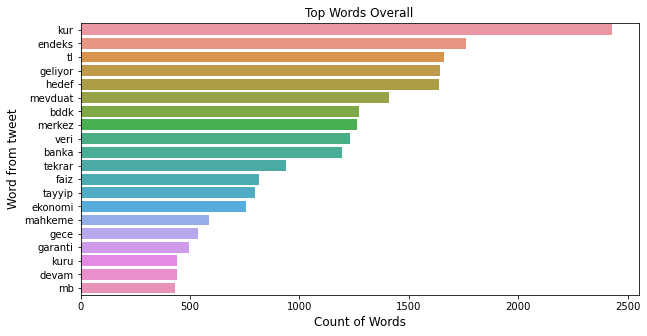

In [81]:
df2=df2[0:20]
plt.figure(figsize=(10,5))
sns.barplot(df2.values,df2.index,alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from tweet',fontsize=12)
plt.xlabel('Count of Words',fontsize=12)
plt.show()


# Word Cloud

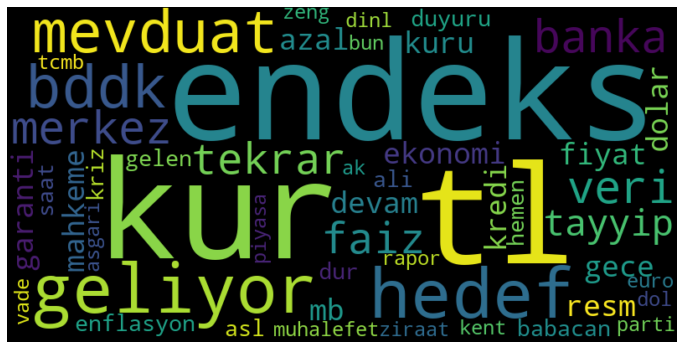

In [186]:
#Frequency of words
fdist = FreqDist(df2['words'])
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Using Bert Model For Classification

In [188]:
#Importing Bert Model
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [189]:
# Uploading Trained Bert Model
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

sentiment_analysis_pipeline= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [193]:
#Chechking
sentiment_analysis_pipeline("tl karşısında dolar kuru çok sert bir şekilde yükselişe geçti ")

[{'label': 'negative', 'score': 0.9465715289115906}]

In [ ]:
# Applying For All Tweets

In [195]:
sentiment_result=[]
for text in tqdm(df.tweets_cleaned):
    result = sentiment_analysis_pipeline(text)[0]
    sentiment_result.append(result)

100%|██████████| 18333/18333 [08:27<00:00, 36.13it/s]


In [198]:
sentiment_result = pd.DataFrame(sentiment_result)
sentiment_result.head(8)

,label,score
0,positive,0.573030
1,negative,0.695054
2,negative,0.933523
3,positive,0.573030
4,negative,0.852814
5,negative,0.922926
6,negative,0.802084
7,positive,0.968256


In [241]:
sentiment_result = pd.DataFrame(sentiment_result)
df = pd.concat([df, sentiment_result],axis=1)
df.label = df.label.map({'positive':1,'negative':0})

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
# Chechking Distribution Of Label

In [232]:
df_tweets=df.filter(['tweets_cleaned','label'])

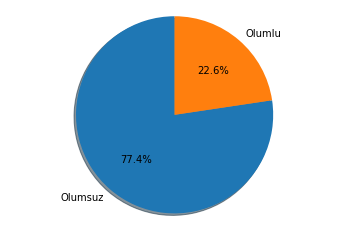

In [233]:
labels = df_tweets.label.map({1:'Olumlu',0:'Olumsuz'}).value_counts().index.values
sizes = df_tweets.label.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [250]:
label_set=df_tweets['label']

In [244]:
stopwords_path = "turkish.txt"
stopwords = get_stopwords_list(stopwords_path)

# Creating Model

In [245]:
# Changing the text to a numerical form: All machine learning and statistical models use mathematics and numbers to compute data. Since the input here is textual, we will use the TF-IDF scheme to process words.
# Import the necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
input_vector = TfidfVectorizer (max_features=20000, min_df=6, max_df=0.8, stop_words=get_stopwords_list(stopwords_path))
cleaned_feature_set = input_vector.fit_transform(df_tweets.tweets_cleaned).toarray()

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arkadaini', 'borcun', 'btt', 'bugn', 'class', 'et', 'ho', 'ke', 'lan', 'linkten', 'mb', 'nasi', 'nasisoyu1', 'nasisoyul', 'nasisoyuı', 'nasissoyulduk', 'naslsoyul', 'nasılsoyul', 'olabilirsiniz', 'shib', 'ship', 'zaman'] not in stop_words.
  warnings.warn(


In [251]:
# Let us now use the Train, Test, Split function to divide this data into training and testing sets. We will use the training set to train the model and find the best suitable model for this prediction and then run that model on the test data to finalize the prediction score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_feature_set, label_set, test_size=0.33, random_state=42)

In [261]:
# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_score = rf_classifier.score(X_train, y_train)
# Support Vector Machine Linear Classification
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_classifier_score = svc_classifier.score(X_train, y_train)
# Logistic Regression
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
lr_classifier_score = lr_classifier.score(X_train, y_train)
# K-Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier_score = knn_classifier.score(X_train, y_train)

In [268]:
# Comparision of individual accuracy scores
accuracy_scores = []
Used_ML_Models = ['Random Forest Classification','Support Vector Machine Classification','Logistic Regression',
                   'KNN Classification']
accuracy_scores.append(rf_classifier_score)
accuracy_scores.append(svc_classifier_score)
accuracy_scores.append(lr_classifier_score)
accuracy_scores.append(knn_classifier_score)
score_comparisons = pd.DataFrame(Used_ML_Models, columns = ['Classifiers'])
score_comparisons['Accuracy on Training Data'] = accuracy_scores
score_comparisons

,Classifiers,Accuracy on Training Data
0,Random Forest Classification,0.974518
1,Support Vector Machine Classification,0.936498
2,Logistic Regression,0.927135
3,KNN Classification,0.936905


In [267]:
# Final prediction using the best-case algorithm from the above table
final_pred = rf_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))

0.9257851239669421
